In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
model=pd.read_excel('PerbandinganModel.xlsx')
model

Unnamed: 0  R2_Train RF Tuning  R2_Test RF Tuning  R2_Train RF_CDD  \
0  Central Jakarta              0.9545             0.7413           0.9716   
1    North Jakarta              0.9504             0.6437           0.9760   
2     West Jakarta              0.9563             0.5891           0.9760   
3     East Jakarta              0.9613             0.5806           0.9801   
4    South Jakarta              0.9607             0.5705           0.9777   

   R2_Test RF_CDD  R2_Train RF_CDD Tuning  R2_Test RF_CDD Tuning  
0          0.8339                  0.9691                 0.8560  
1          0.8081                  0.9747                 0.8196  
2          0.6609                  0.9712                 0.6771  
3          0.7615                  0.9816                 0.7807  
4          0.6936                  0.9781                 0.7074

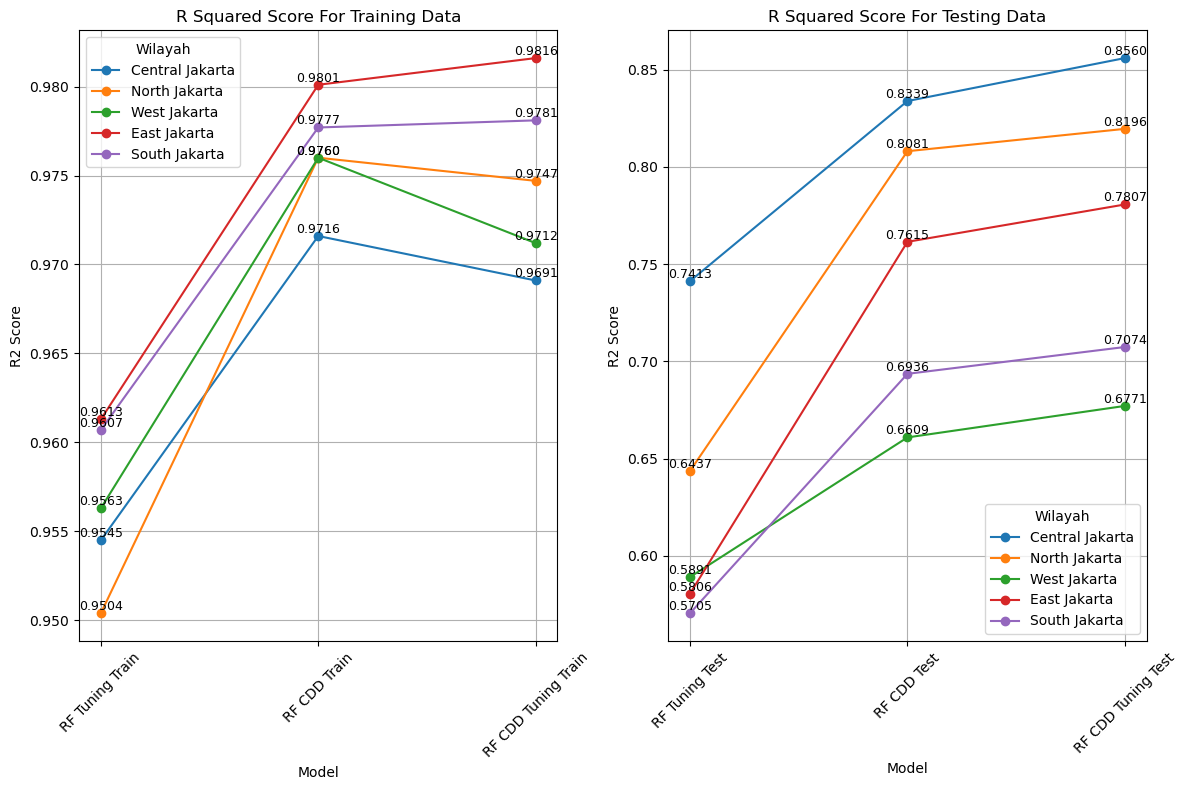

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Data yang diberikan
data = {
    "Unnamed: 0": ["Central Jakarta", "North Jakarta", "West Jakarta", "East Jakarta", "South Jakarta"],
    "RF Tuning Train": [0.9545, 0.9504, 0.9563, 0.9613, 0.9607],
    "RF Tuning Test": [0.7413, 0.6437, 0.5891, 0.5806, 0.5705],
    "RF CDD Train": [0.9716, 0.9760, 0.9760, 0.9801, 0.9777],
    "RF CDD Test": [0.8339, 0.8081, 0.6609, 0.7615, 0.6936],
    "RF CDD Tuning Train": [0.9691, 0.9747, 0.9712, 0.9816, 0.9781],
    "RF CDD Tuning Test": [0.8560, 0.8196, 0.6771, 0.7807, 0.7074]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Mengatur kolom 'Unnamed: 0' sebagai index
df.set_index("Unnamed: 0", inplace=True)

# Membuat subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))  # 1 baris, 2 kolom

# Plot untuk Train
for wilayah in df.index:
    axes[0].plot(df.columns[::2], df.loc[wilayah][::2], marker='o', label=wilayah)
    # Menambahkan label nilai untuk setiap titik
    for i, nilai in enumerate(df.loc[wilayah][::2]):
        axes[0].text(i, nilai, f"{nilai:.4f}", ha='center', va='bottom', fontsize=9)
axes[0].set_title("R Squared Score For Training Data")
axes[0].set_xlabel("Model")
axes[0].set_ylabel("R2 Score")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title="Wilayah")
axes[0].grid(True)

# Plot untuk Test
for wilayah in df.index:
    axes[1].plot(df.columns[1::2], df.loc[wilayah][1::2], marker='o', label=wilayah)
    # Menambahkan label nilai untuk setiap titik
    for i, nilai in enumerate(df.loc[wilayah][1::2]):
        axes[1].text(i, nilai, f"{nilai:.4f}", ha='center', va='bottom', fontsize=9)
axes[1].set_title("R Squared Score For Testing Data")
axes[1].set_xlabel("Model")
axes[1].set_ylabel("R2 Score")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title="Wilayah")
axes[1].grid(True)

# Menyimpan gambar dan PDF
plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
plt.savefig('Comparing R_Square.png', dpi=300, bbox_inches='tight')
with PdfPages('Comparing R_Square.pdf') as pdf:
    pdf.savefig(fig)  # Menyimpan seluruh figure ke PDF

plt.show()

In [2]:
jakpus_analisis=pd.read_excel('Jakpus_Analisis.xlsx')
jakpus_analisis_lag_4=jakpus_analisis.iloc[0:825:,2:9]
jakpus_analisis_lag_4.head()

Jumlah.Kasus.DBD (y)  Average.of.Tavg  Average.of.Rhavg  Sum.of.RR  \
0                    56        28.571429         74.857143        4.8   
1                    50        28.742857         81.428571        2.8   
2                    61        27.600000         83.285714        0.6   
3                    99        26.771429         85.000000      387.7   
4                    84        25.900000         83.428571      116.1   

   Average.of.ss  Sum.of.pengguna.krl  Jumlah.Kasus.DBD lag 4  
0       2.210714             4.266629                      49  
1       6.085714             4.089555                      50  
2       5.085714             3.711553                      48  
3       6.328571             4.581505                      47  
4       2.930952             4.447622                      56

In [3]:
jakbar_analisis=pd.read_excel('Jakbar_Analisis.xlsx')
jakbar_analisis_lag_4=jakbar_analisis.iloc[0:822:,[2,3,4,5,6,7,11]]
jakbar_analisis_lag_4.head()

Jumlah Kasus DBD (y)  Average of Tavg  Average of Rhavg  Sum of RR  \
0                    86        26.771429         81.428571        0.6   
1                    98        25.900000         83.285714      387.7   
2                    83        26.214286         85.000000      116.1   
3                    58        26.585714         83.428571       98.4   
4                   130        27.128571         82.142857      147.5   

   Average of ss  Sum of pengguna krl  Jumlah Kasus DBD Lag 4  
0       2.930952             4.692709                      67  
1       1.404762             4.412848                      51  
2       0.852381             4.266629                      29  
3       1.675000             4.089555                      52  
4       1.925714             3.711553                      86

In [4]:
jaksel_analisis=pd.read_excel('Jaksel_Analisis.xlsx')
jaksel_analisis_lag_4=jaksel_analisis.iloc[0:825:,2:9]
jaksel_analisis_lag_4.head()

Jumlah.Kasus.DBD (y)  Average.of.Tavg  Average.of.Rhavg  Sum.of.RR  \
0                   114        27.600000         81.428571      105.1   
1                   120        26.771429         83.285714        4.8   
2                   108        25.900000         85.000000        2.8   
3                   140        26.214286         83.428571        0.6   
4                   157        26.585714         82.142857      387.7   

   Average.of.ss  Sum.of.pengguna.krl  Jumlah.Kasus.DBD lag 4  
0       2.930952             4.412848                     113  
1       1.404762             4.266629                     107  
2       0.852381             4.089555                     104  
3       1.675000             3.711553                      92  
4       1.925714             4.581505                     114

In [5]:
jaktim_analisis=pd.read_excel('Jaktim_Analisis.xlsx')
jaktim_analisis_lag_4=jaktim_analisis.iloc[0:825:,2:9]
jaktim_analisis_lag_4.head()

Jumlah Kasus DBD (y)  Average of Tavg  Average of Rhavg  Sum of RR  \
0                   125        28.571429         73.714286      105.1   
1                   130        28.742857         72.000000        4.8   
2                   163        27.600000         74.857143        2.8   
3                   199        26.771429         81.428571        0.6   
4                   223        25.900000         83.285714      387.7   

   Average of ss  Sum of pengguna krl  Jumlah Kasus DBD lag 4  
0       6.085714             4.692709                     125  
1       5.085714             4.412848                     113  
2       6.328571             4.266629                     106  
3       2.930952             4.089555                     118  
4       1.404762             3.711553                     125

In [6]:
jakut_analisis=pd.read_excel('Jakut_Analisis.xlsx')
jakut_analisis_lag_4=jakut_analisis.iloc[0:823:,2:9]
jakut_analisis_lag_4.head()

Jumlah Kasus DBD (y)  Average.of.Tavg  Average.of.Rhavg  Sum.of.RR  \
0                    66        28.485714         76.285714       9.95   
1                    74        27.700000         79.857143     198.00   
2                    86        27.014286         83.142857     231.30   
3                    68        26.585714         82.714286     108.10   
4                    49        26.771429         82.857143     228.50   

   Average.of.ss  Sum.of.pengguna.krl  Jumlah Kasus DBD lag 4  
0       6.942857             4.692709                      66  
1       3.857143             4.412848                      51  
2       2.642857             4.266629                      53  
3       0.428571             4.089555                      76  
4       0.985714             3.711553                      66

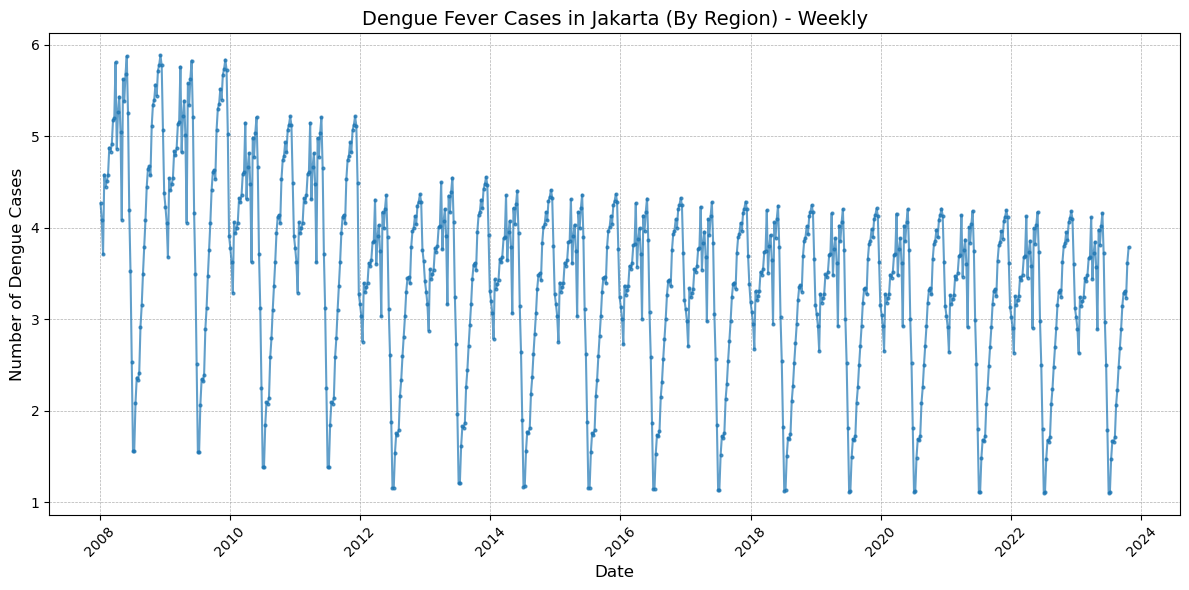

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# Define the date range from 2008-01-01 to 2023-12-31, with weekly intervals
start_date = '2008-01-01'
end_date = '2023-12-31'

# Generate weekly dates from start_date to end_date
dates = pd.date_range(start=start_date, end=end_date, freq='W')

# Ensure that each dataset has the correct length
jakpus_analisis_lag_4['date'] = dates[:len(jakpus_analisis_lag_4)]
jaksel_analisis_lag_4['date'] = dates[:len(jaksel_analisis_lag_4)]
jakbar_analisis_lag_4['date'] = dates[:len(jakbar_analisis_lag_4)]
jaktim_analisis_lag_4['date'] = dates[:len(jaktim_analisis_lag_4)]
jakut_analisis_lag_4['date'] = dates[:len(jakut_analisis_lag_4)]

# Plot line chart for each region
plt.figure(figsize=(12, 6))

# Menggunakan palet warna yang lebih kontras
colors = cm.get_cmap('tab10')

plt.plot(jakpus_analisis_lag_4['date'], jakpus_analisis_lag_4['Sum.of.pengguna.krl'], 
        color=colors(0), alpha=0.7, marker='o', markersize=2)

# Menambahkan grid dan detail chart
plt.title('Dengue Fever Cases in Jakarta (By Region) - Weekly', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Dengue Cases', fontsize=12)
plt.xticks(rotation=45)  # Adjust date labels for readability
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Simpan plot dengan resolusi tinggi
plt.savefig('KRL_Improved.png', dpi=300, bbox_inches='tight')

# Tampilkan plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


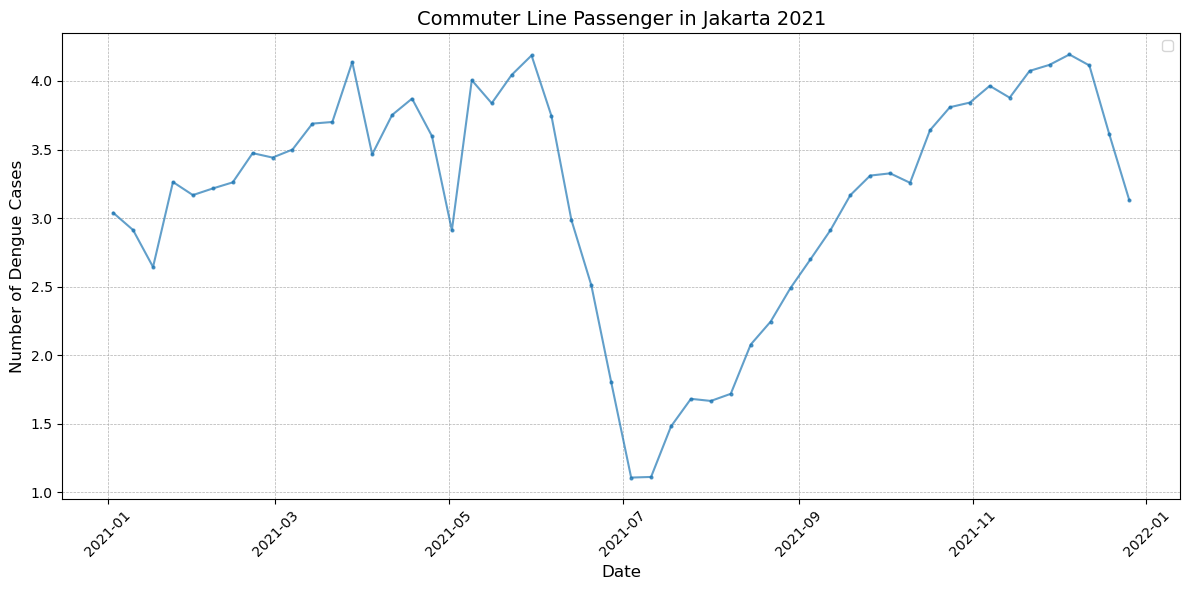

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# Define the date range for 2021
start_filter = '2021-01-01'
end_filter = '2021-12-31'

# Filter data for each region within the 2021 date range
jakpus_filtered = jakpus_analisis_lag_4[(jakpus_analisis_lag_4['date'] >= start_filter) & (jakpus_analisis_lag_4['date'] <= end_filter)]
jaksel_filtered = jaksel_analisis_lag_4[(jaksel_analisis_lag_4['date'] >= start_filter) & (jaksel_analisis_lag_4['date'] <= end_filter)]
jakbar_filtered = jakbar_analisis_lag_4[(jakbar_analisis_lag_4['date'] >= start_filter) & (jakbar_analisis_lag_4['date'] <= end_filter)]
jaktim_filtered = jaktim_analisis_lag_4[(jaktim_analisis_lag_4['date'] >= start_filter) & (jaktim_analisis_lag_4['date'] <= end_filter)]
jakut_filtered = jakut_analisis_lag_4[(jakut_analisis_lag_4['date'] >= start_filter) & (jakut_analisis_lag_4['date'] <= end_filter)]

# Plot line chart for each region (2021)
plt.figure(figsize=(12, 6))

# Menggunakan palet warna yang lebih kontras
colors = cm.get_cmap('tab10')

plt.plot(jakpus_filtered['date'], jakpus_filtered['Sum.of.pengguna.krl'], 
         color=colors(0), alpha=0.7, marker='o', markersize=2)


# Menambahkan grid dan detail chart
plt.title('Commuter Line Passenger in Jakarta 2021', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Dengue Cases', fontsize=12)
plt.xticks(rotation=45)  # Adjust date labels for readability
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Simpan plot dengan resolusi tinggi
plt.savefig('KRL_Improved_2021.png', dpi=300, bbox_inches='tight')
with PdfPages('KRL.pdf') as pdf:
    pdf.savefig()  # Save the current figure to the PDF

# Tampilkan plot
plt.show()


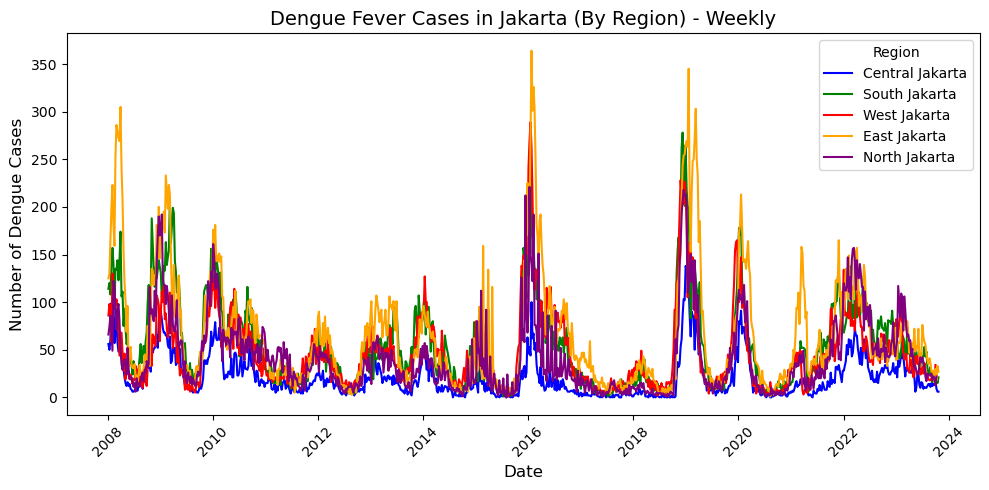

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Define the date range from 2008-01-01 to 2023-12-31, with weekly intervals
start_date = '2008-01-01'
end_date = '2023-12-31'

# Generate weekly dates from start_date to end_date
dates = pd.date_range(start=start_date, end=end_date, freq='W')

# Ensure that each dataset has the correct length
jakpus_analisis_lag_4['date'] = dates[:len(jakpus_analisis_lag_4)]
jaksel_analisis_lag_4['date'] = dates[:len(jaksel_analisis_lag_4)]
jakbar_analisis_lag_4['date'] = dates[:len(jakbar_analisis_lag_4)]
jaktim_analisis_lag_4['date'] = dates[:len(jaktim_analisis_lag_4)]
jakut_analisis_lag_4['date'] = dates[:len(jakut_analisis_lag_4)]

# Plot line chart for each region
plt.figure(figsize=(10, 5))

plt.plot(jakpus_analisis_lag_4['date'], jakpus_analisis_lag_4['Jumlah.Kasus.DBD (y)'], label='Central Jakarta', color='blue')
plt.plot(jaksel_analisis_lag_4['date'], jaksel_analisis_lag_4['Jumlah.Kasus.DBD (y)'], label='South Jakarta', color='green')
plt.plot(jakbar_analisis_lag_4['date'], jakbar_analisis_lag_4['Jumlah Kasus DBD (y)'], label='West Jakarta', color='red')
plt.plot(jaktim_analisis_lag_4['date'], jaktim_analisis_lag_4['Jumlah Kasus DBD (y)'], label='East Jakarta', color='orange')
plt.plot(jakut_analisis_lag_4['date'], jakut_analisis_lag_4['Jumlah Kasus DBD (y)'], label='North Jakarta', color='purple')

# Add details to the chart
plt.title('Dengue Fever Cases in Jakarta (By Region) - Weekly', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Dengue Cases', fontsize=12)
plt.legend(title="Region")
plt.xticks(rotation=45)  # Adjust date labels for readability
plt.tight_layout()


plt.savefig('Dengue Cases Weekly.png', dpi=300, bbox_inches='tight')
with PdfPages('Dengue_Cases_Weekly.pdf') as pdf:
    pdf.savefig()  # Save the current figure to the PDF

# Display the chart
plt.show()

KeyError: 'tanggal'

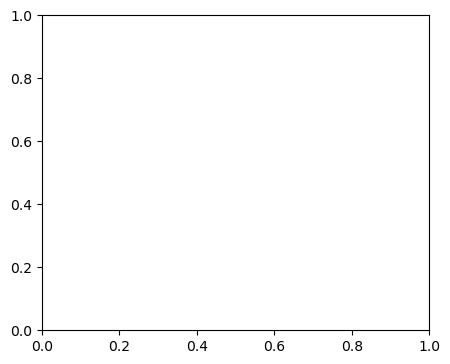

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalkan data kamu sudah berada dalam DataFrame 'jakpus_analisis_lag_4', 'jakut_analisis_lag_4', dll.
# Data memiliki kolom 'tanggal', 'temperatur', 'kelembaban', 'curah_hujan', 'lamanya_penyinaran'

# Membuat figure dengan 4 subplot (2 baris, 2 kolom)
plt.figure(figsize=(11, 9))

# Line plot untuk temperatur
plt.subplot(2, 2, 1)
plt.plot(jakpus_analisis_lag_4['tanggal'], jakpus_analisis_lag_4['Average.of.Tavg'], label='Jakarta Pusat', color='blue')
plt.plot(jakut_analisis_lag_4['tanggal'], jakut_analisis_lag_4['Average.of.Tavg'], label='Jakarta Utara', color='green')
plt.title('Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Line plot untuk kelembaban
plt.subplot(2, 2, 2)
plt.plot(jakpus_analisis_lag_4['tanggal'], jakpus_analisis_lag_4['Average.of.Rhavg'], label='Jakarta Pusat', color='blue')
plt.plot(jakut_analisis_lag_4['tanggal'], jakut_analisis_lag_4['Average.of.Rhavg'], label='Jakarta Utara', color='green')
plt.title('Humidity over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')

# Line plot untuk curah hujan
plt.subplot(2, 2, 3)
plt.plot(jakpus_analisis_lag_4['tanggal'], jakpus_analisis_lag_4['Sum.of.RR'], label='Jakarta Pusat', color='blue')
plt.plot(jakut_analisis_lag_4['tanggal'], jakut_analisis_lag_4['Sum.of.RR'], label='Jakarta Utara', color='green')
plt.title('Rainfall over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')

# Line plot untuk lamanya penyinaran matahari
plt.subplot(2, 2, 4)
plt.plot(jakpus_analisis_lag_4['tanggal'], jakpus_analisis_lag_4['Average.of.ss'], label='Jakarta Pusat', color='blue')
plt.plot(jakut_analisis_lag_4['tanggal'], jakut_analisis_lag_4['Average.of.ss'], label='Jakarta Utara', color='green')
plt.title('Sunlight Duration over Time')
plt.xlabel('Date')
plt.ylabel('Sunlight Duration (hours)')


# Menampilkan grafik dengan layout yang rapih

plt.savefig('Iklim.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


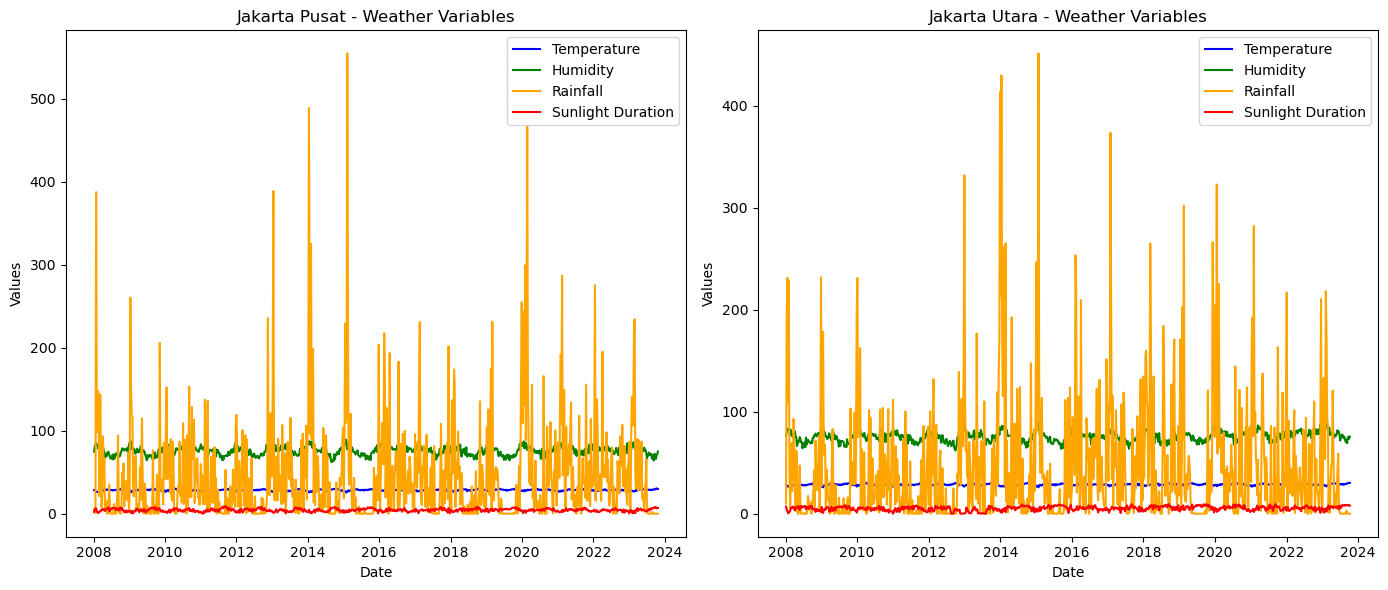

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalkan data kamu sudah berada dalam DataFrame 'jakpus_analisis_lag_4', 'jakut_analisis_lag_4', dll.
# Data memiliki kolom 'tanggal', 'temperatur', 'kelembaban', 'curah_hujan', 'lamanya_penyinaran'

# Membuat figure dengan 1 baris dan 2 kolom untuk masing-masing wilayah
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Grafik untuk Jakarta Pusat
axs[0].plot(jakpus_analisis_lag_4['tanggal'], jakpus_analisis_lag_4['Average.of.Tavg'], label='Temperature', color='blue')
axs[0].plot(jakpus_analisis_lag_4['tanggal'], jakpus_analisis_lag_4['Average.of.Rhavg'], label='Humidity', color='green')
axs[0].plot(jakpus_analisis_lag_4['tanggal'], jakpus_analisis_lag_4['Sum.of.RR'], label='Rainfall', color='orange')
axs[0].plot(jakpus_analisis_lag_4['tanggal'], jakpus_analisis_lag_4['Average.of.ss'], label='Sunlight Duration', color='red')
axs[0].set_title('Jakarta Pusat - Weather Variables')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Values')
axs[0].legend()

# Grafik untuk Jakarta Utara
axs[1].plot(jakut_analisis_lag_4['tanggal'], jakut_analisis_lag_4['Average.of.Tavg'], label='Temperature', color='blue')
axs[1].plot(jakut_analisis_lag_4['tanggal'], jakut_analisis_lag_4['Average.of.Rhavg'], label='Humidity', color='green')
axs[1].plot(jakut_analisis_lag_4['tanggal'], jakut_analisis_lag_4['Sum.of.RR'], label='Rainfall', color='orange')
axs[1].plot(jakut_analisis_lag_4['tanggal'], jakut_analisis_lag_4['Average.of.ss'], label='Sunlight Duration', color='red')
axs[1].set_title('Jakarta Utara - Weather Variables')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Values')
axs[1].legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()


In [40]:
data=pd.read_excel('PythonJakpus.xlsx')
data_after=pd.read_csv('PythonPusat.csv')
data.head()

Tanggal  Tavg  RH_avg    RR   ss
0  30-12-2007  27.8    76.0   6.0  5.8
1  31-12-2007  27.8    79.0  23.0  0.0
2  01-01-2008  27.1    86.0  29.4  0.5
3  02-01-2008  26.3    88.0   1.6  NaN
4  03-01-2008  25.5    90.0  32.3  NaN

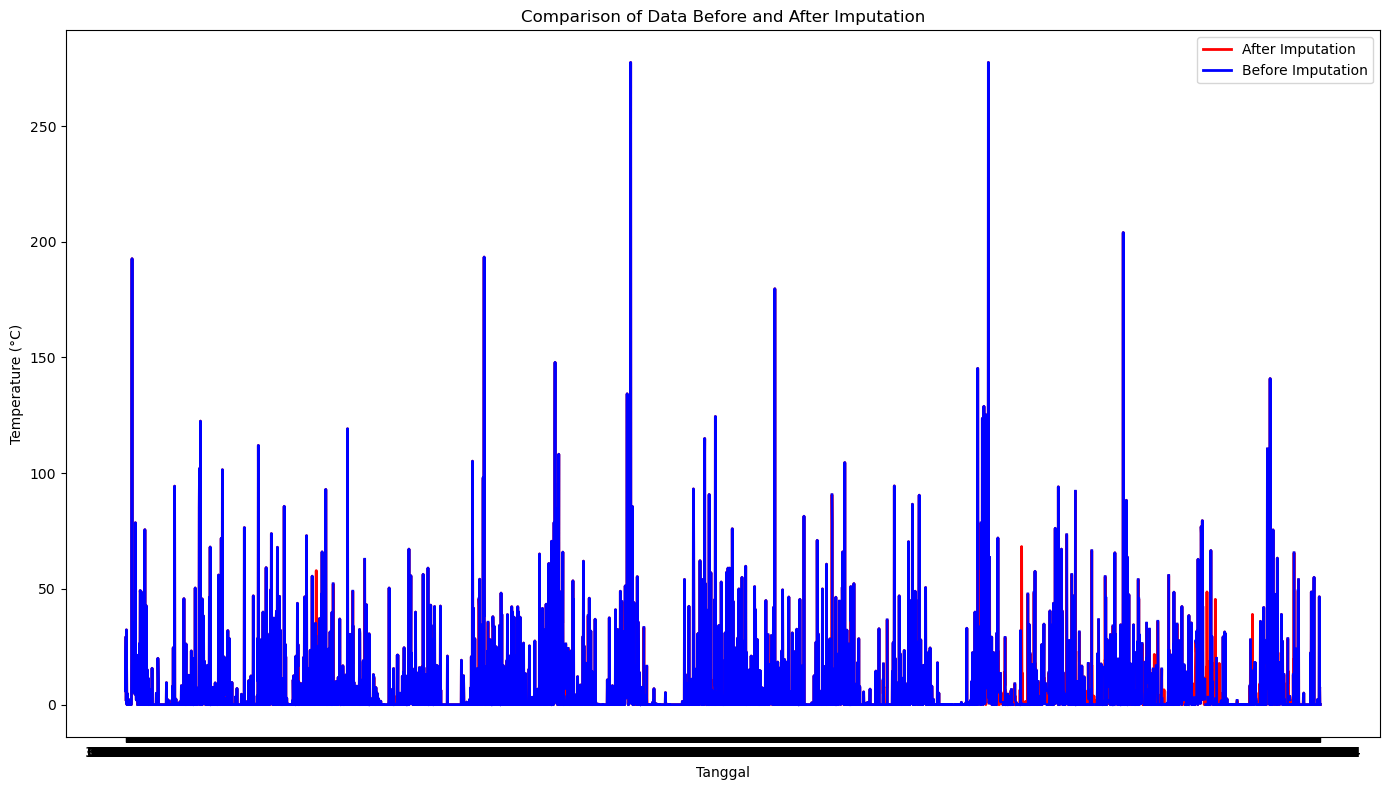

In [43]:
import matplotlib.pyplot as plt

# Pastikan data sebelum dan sesudah imputasi sudah ada di DataFrame 'data' dan 'data_after'

# Membuat plot garis untuk data sebelum dan sesudah imputasi
plt.figure(figsize=(14, 8))

# Garis untuk data setelah imputasi
plt.plot(data_after['Tanggal'], data_after['RR'], label='After Imputation', color='red', linewidth=2)

# Garis untuk data sebelum imputasi
plt.plot(data['Tanggal'], data['RR'], label='Before Imputation', color='blue', linewidth=2)

# Menambahkan judul dan label sumbu
plt.title('Comparison of Data Before and After Imputation')
plt.xlabel('Tanggal')
plt.ylabel('Temperature (°C)')

# Menambahkan legend untuk membedakan kedua garis
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


In [8]:
jp=pd.read_csv("PythonPusat.csv")
ju=pd.read_csv("PythonUtara.csv")

In [9]:
jp1=jp.iloc[0:5846:,1:6]
jp1.tail()
ju1=ju.iloc[0:5846:,1:6]
ju1.tail()

Tanggal  Tavg  RH_avg   RR   ss
5841  27-12-2023  29.4    80.0  0.0  0.0
5842  28-12-2023  30.4    78.0  0.0  4.5
5843  29-12-2023  29.8    79.0  0.0  8.4
5844  30-12-2023  29.7    79.0  0.2  4.6
5845  31-12-2023  29.1    80.0  0.2  3.1

In [15]:
jp1fix.head()

NameError: name 'jp1fix' is not defined

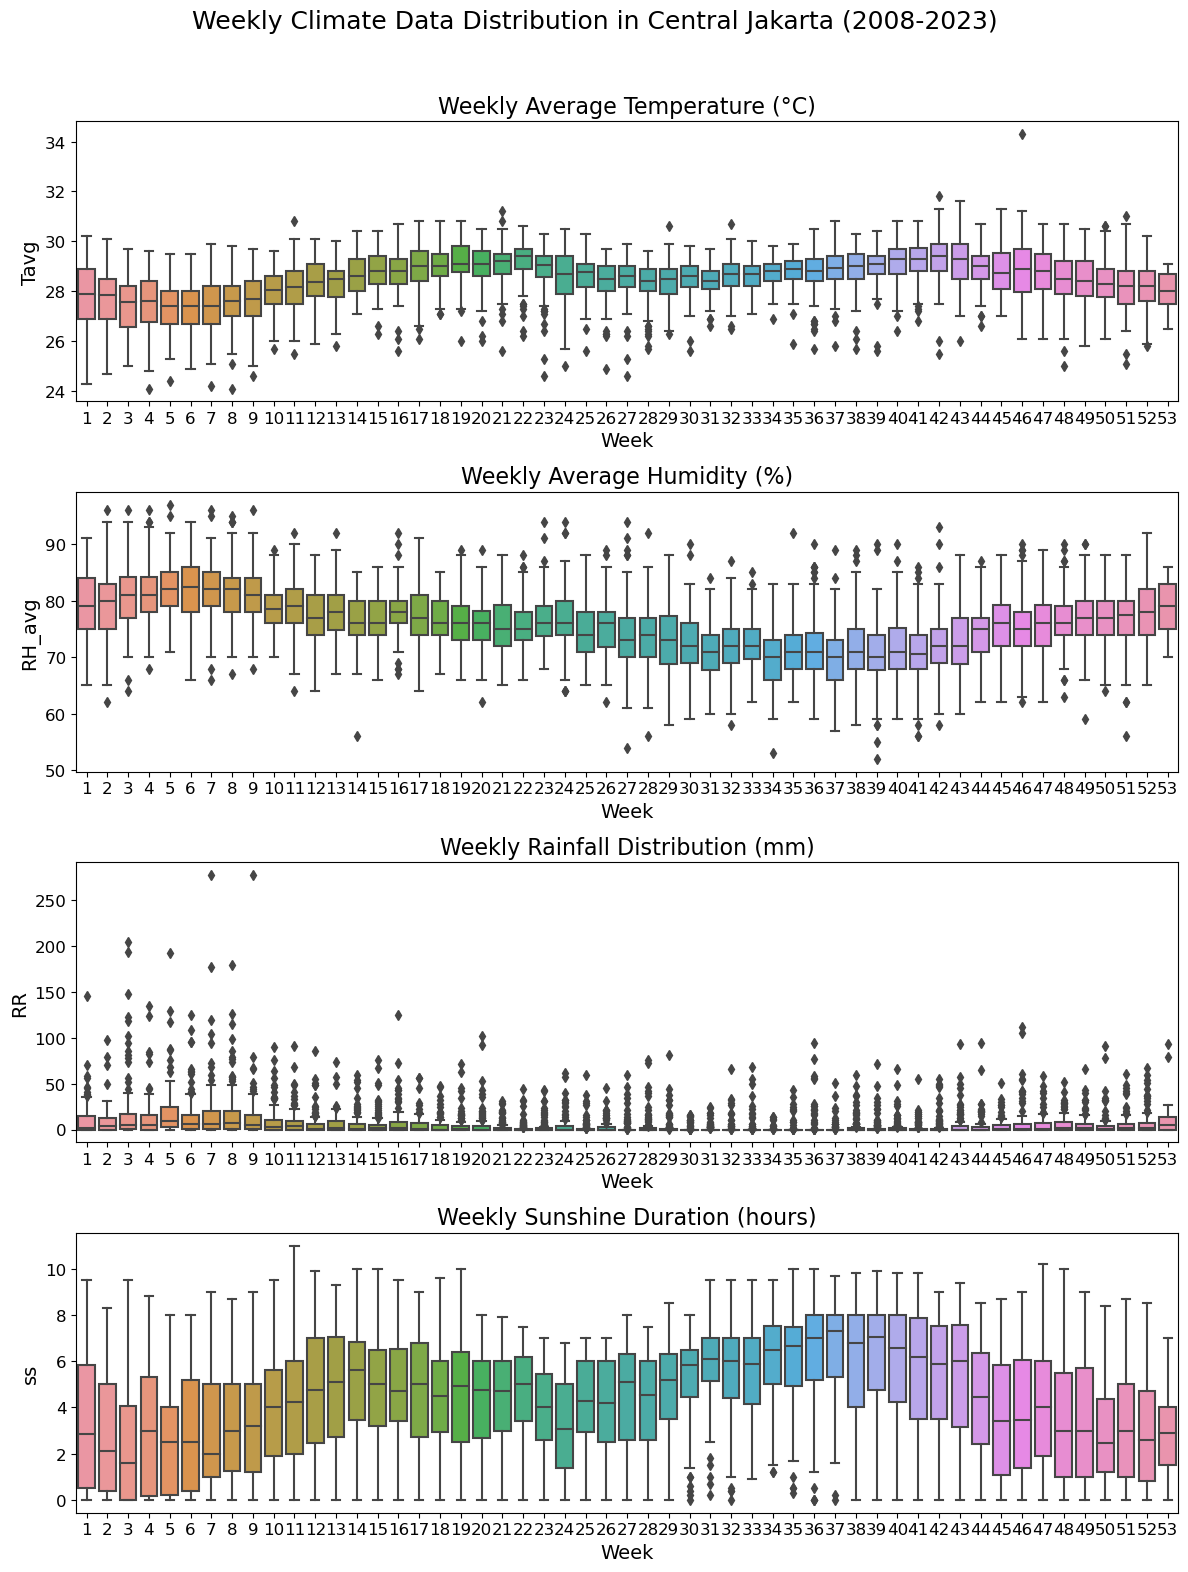

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Pastikan format tanggal sesuai
jp1['Tanggal'] = pd.to_datetime(jp1['Tanggal'], format='%d-%m-%Y')
ju1['Tanggal'] = pd.to_datetime(ju1['Tanggal'], format='%d-%m-%Y')

# Tambahkan kolom 'Week' ke masing-masing dataset
jp1['Week'] = jp1['Tanggal'].dt.isocalendar().week
ju1['Week'] = ju1['Tanggal'].dt.isocalendar().week

# Jumlahkan durasi penyinaran matahari per minggu
jp1_ss_weekly_sum = jp1.groupby('Week')['ss'].sum().reset_index()
jp1fix = pd.concat([jp1, jp1_ss_weekly_sum], axis=0, ignore_index=True)

plt.figure(figsize=(12, 16))
plt.suptitle('Weekly Climate Data Distribution in Central Jakarta (2008-2023)', fontsize=18)

variables = ['Tavg', 'RH_avg', 'RR', 'ss']
custom_titles = [
    'Weekly Average Temperature (°C)',
    'Weekly Average Humidity (%)',
    'Weekly Rainfall Distribution (mm)',
    'Weekly Sunshine Duration (hours)'
]

for i, var in enumerate(variables, 1):
    plt.subplot(4, 1, i)
    sns.boxplot(x='Week', y=var, data=jp1)
    plt.title(custom_titles[i - 1], fontsize=16)  # Perbesar font title subplot
    plt.xlabel('Week', fontsize=14)  # Perbesar font xlabel
    plt.ylabel(var, fontsize=14)  # Perbesar font ylabel
    plt.xticks(fontsize=12)  # Perbesar font angka di x-axis
    plt.yticks(fontsize=12)  # Perbesar font angka di y-axis

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('IklimJakpus.png', dpi=300, bbox_inches='tight')

with PdfPages('IklimJakpus.pdf') as pdf:
    pdf.savefig()  # Save the current figure to the PDF

plt.show()


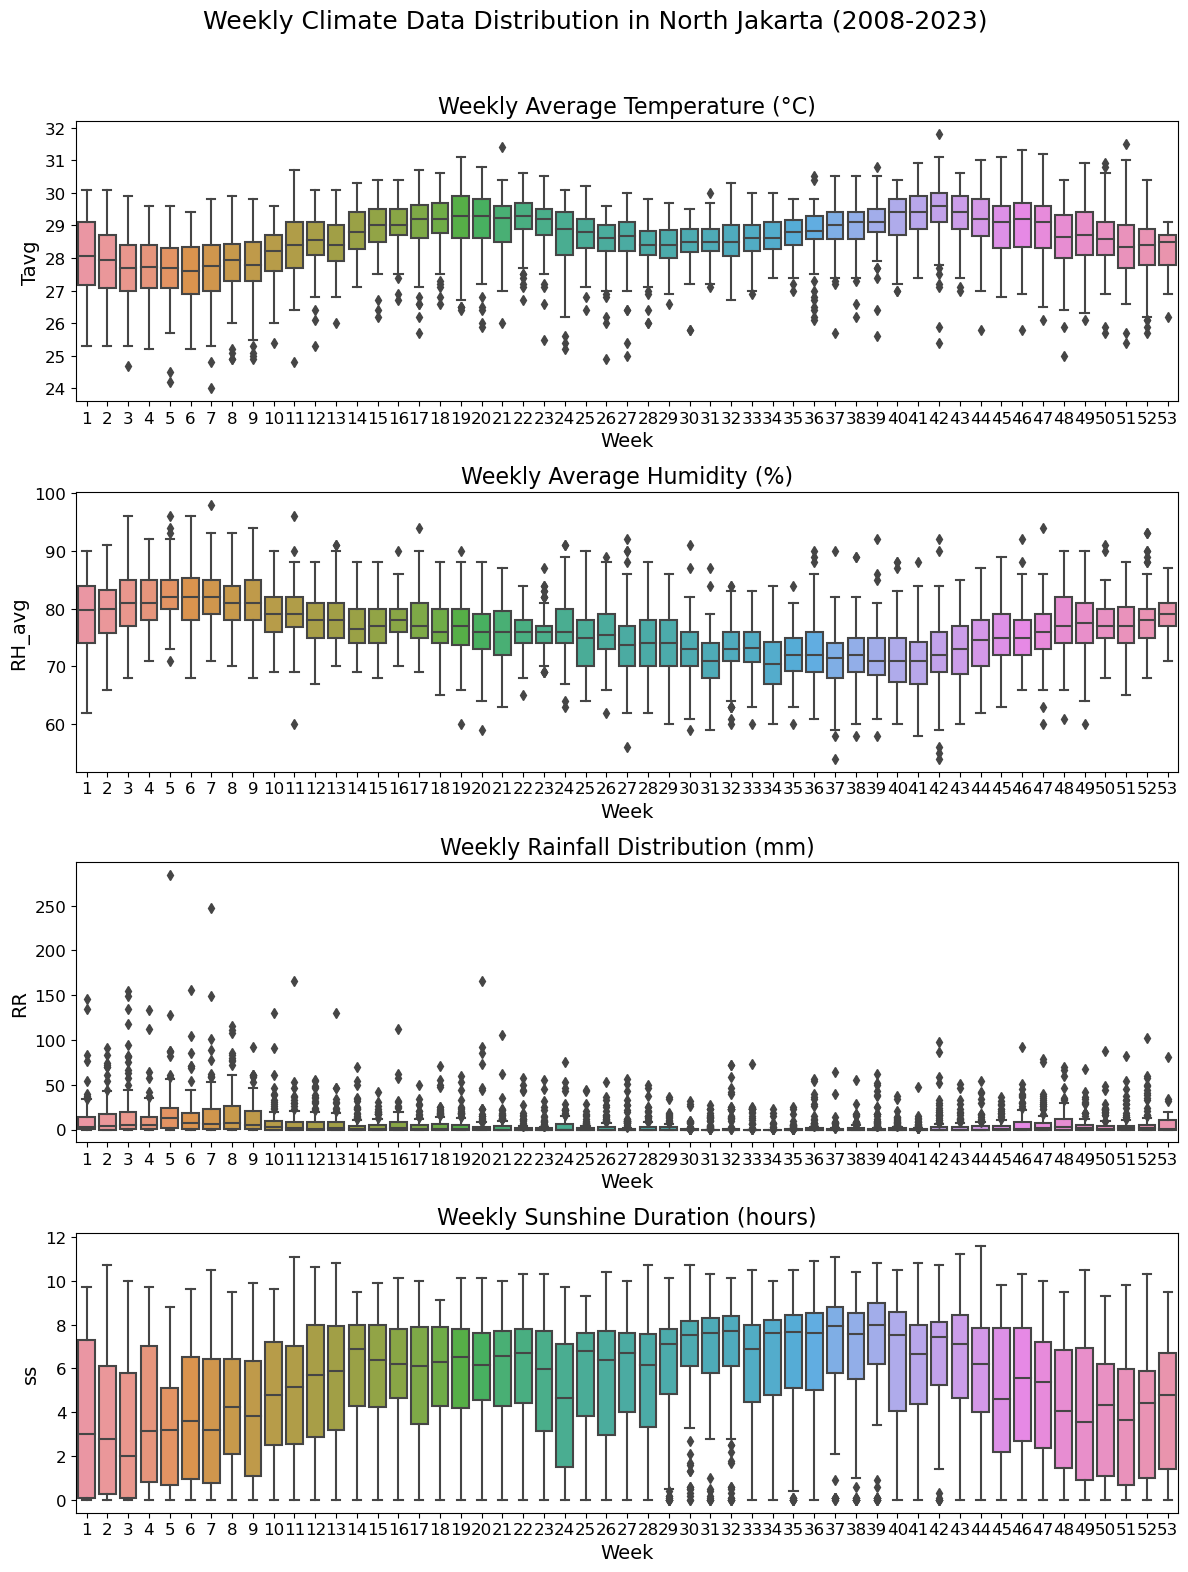

In [13]:
plt.figure(figsize=(12, 16))
plt.suptitle('Weekly Climate Data Distribution in North Jakarta (2008-2023)',fontsize=18)

custom_titles = [
    'Weekly Average Temperature (°C)',
    'Weekly Average Humidity (%)',
    'Weekly Rainfall Distribution (mm)',
    'Weekly Sunshine Duration (hours)'
]

for i, var in enumerate(variables, 1):
    plt.subplot(4, 1, i)
    sns.boxplot(x='Week', y=var, data=ju1)
    plt.title(custom_titles[i - 1], fontsize=16)  # Perbesar font title subplot
    plt.xlabel('Week', fontsize=14)  # Perbesar font xlabel
    plt.ylabel(var, fontsize=14)  # Perbesar font ylabel
    plt.xticks(fontsize=12)  # Perbesar font angka di x-axis
    plt.yticks(fontsize=12)  # Perbesar font angka di y-axis
    

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('IklimJakut.png', dpi=300, bbox_inches='tight')
with PdfPages('IklimJakut.pdf') as pdf:
    pdf.savefig()  # Save the current figure to the PDF


plt.show()


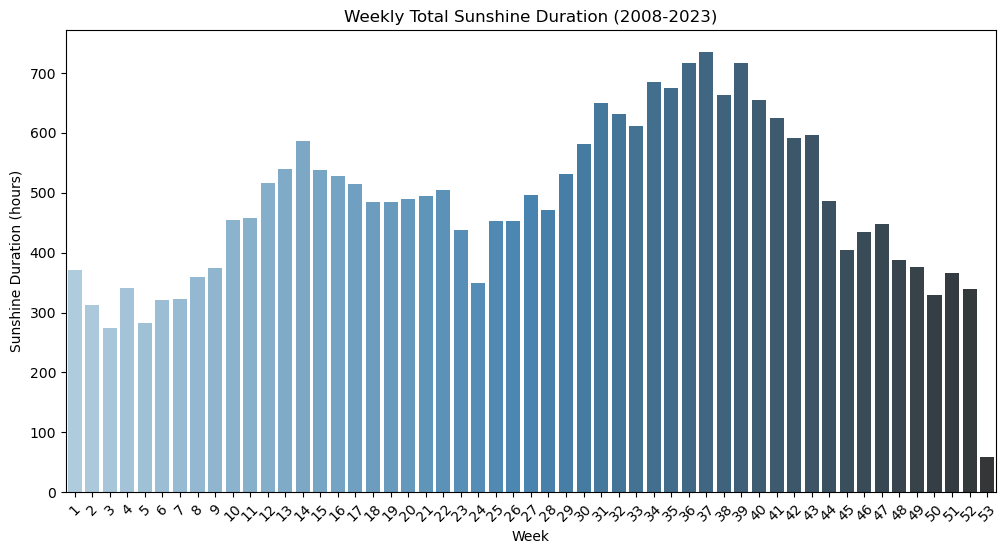

In [22]:
# Jumlahkan durasi penyinaran matahari per minggu
jp1_ss_weekly_sum = jp1.groupby('Week')['ss'].sum().reset_index()

# Plot data setelah penjumlahan
plt.figure(figsize=(12, 6))
sns.barplot(x='Week', y='ss', data=jp1_ss_weekly_sum, palette='Blues_d')
plt.title('Weekly Total Sunshine Duration (2008-2023)')
plt.xlabel('Week')
plt.ylabel('Sunshine Duration (hours)')
plt.xticks(rotation=45)
plt.show()


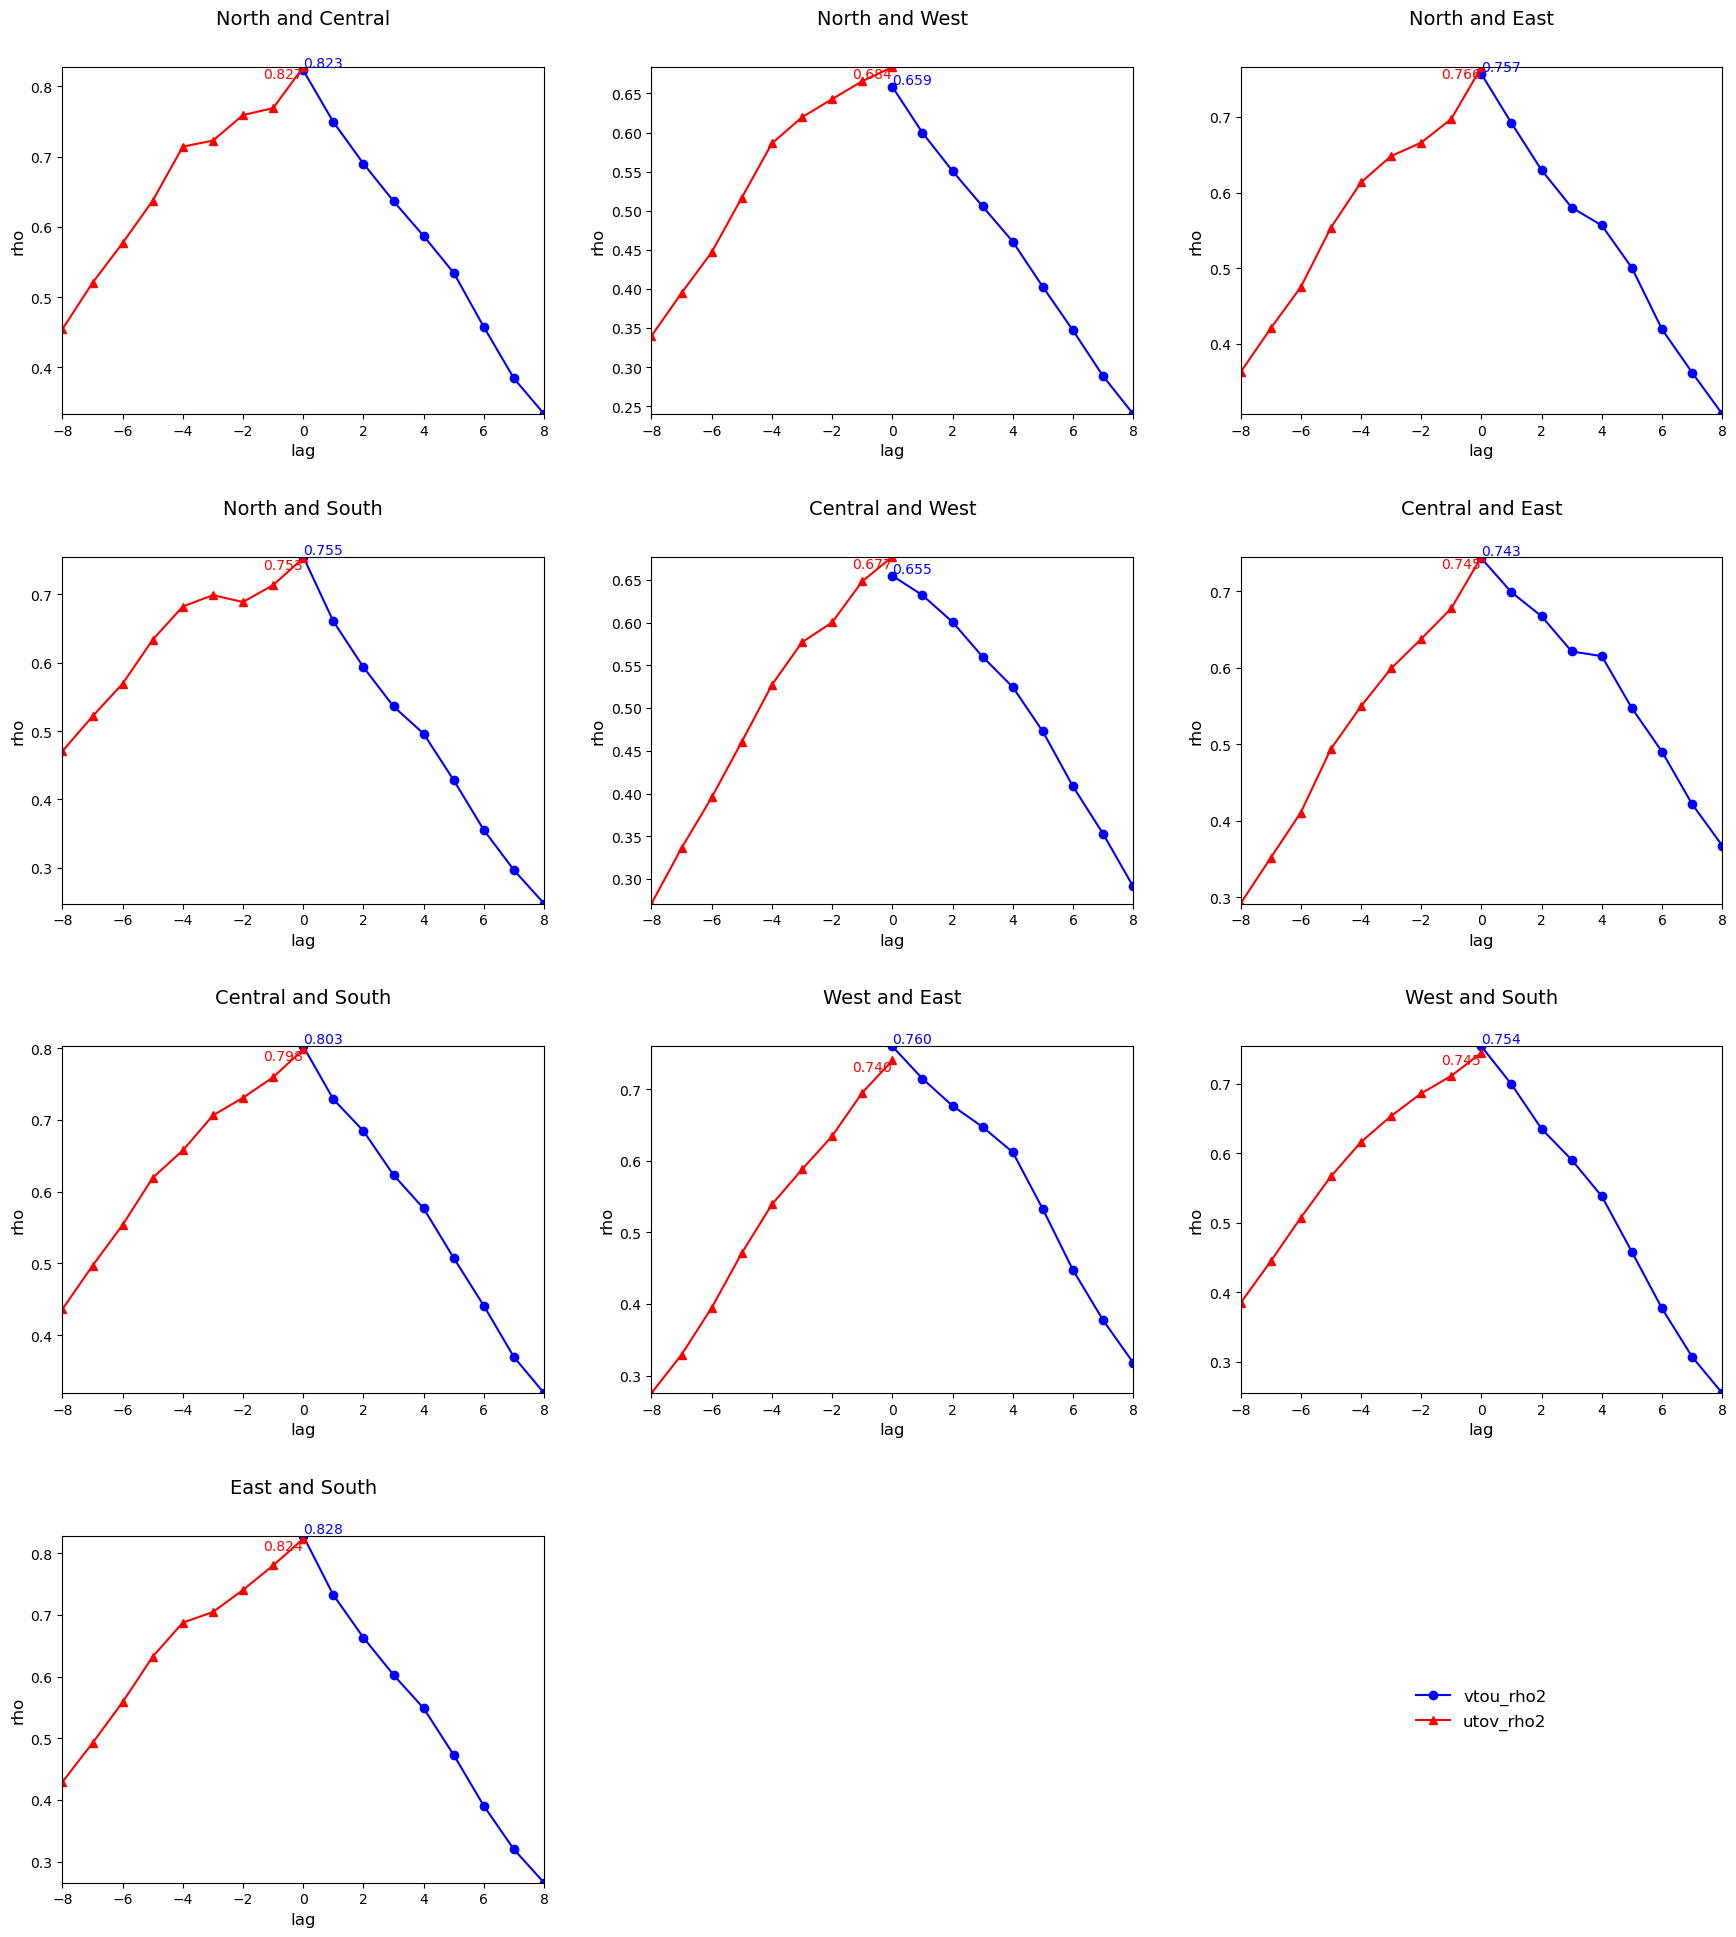

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x1 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
x2 = np.array([-8, -7, -6, -5, -4, -3, -2, -1, 0])

# Data y1 dan y2 untuk setiap pasangan
data = {
    "North and Central": {
        "y1": [0.8230286, 0.7493574, 0.6901409, 0.6366655, 0.5871204, 0.5345872, 0.4575209, 0.3842947, 0.3337930],
        "y2": [0.4545000, 0.5204705, 0.5771297, 0.6374841, 0.7143542, 0.7229003, 0.7593158, 0.7691603, 0.8274903]
    },
    "North and West": {
        "y1": [0.6586216, 0.5998548, 0.5508195, 0.5055917, 0.4605587, 0.4027020, 0.3470975, 0.2886607, 0.2401505],
        "y2": [0.3399813, 0.3948886, 0.4469586, 0.5167713, 0.5861548, 0.6196204, 0.6427792, 0.6657500, 0.6836970]
    },
    "North and East": {
        "y1": [0.7569662, 0.6919931, 0.6298135, 0.5803322, 0.5566935, 0.5005125, 0.4193106, 0.3620865, 0.3072944],
        "y2": [0.3624881, 0.4204607, 0.4750526, 0.5537441, 0.6136182, 0.6483844, 0.6661742, 0.6975312, 0.7660410]
    },
    "North and South": {
        "y1": [0.7552550, 0.6606939, 0.5935659, 0.5361611, 0.4962344, 0.4281408, 0.3552719, 0.2965619, 0.2477299],
        "y2": [0.4707200, 0.5216805, 0.5695057, 0.6338503, 0.6824025, 0.6989942, 0.6890025, 0.7137836, 0.7532098]
    },
    "Central and West": {
        "y1": [0.6548652, 0.6321261, 0.6007174, 0.5600332, 0.5245806, 0.4725884, 0.4083330, 0.3529394, 0.2912115],
        "y2": [0.2712176, 0.3362733, 0.3954296, 0.4605767, 0.5271304, 0.5769691, 0.6002746, 0.6482325, 0.6771122]
    },
    "Central and East": {
        "y1": [0.7431301, 0.6987224, 0.6673767, 0.6213502, 0.6152235, 0.5471769, 0.4903405, 0.4218295, 0.3675627],
        "y2": [0.2918572, 0.3515398, 0.4107761, 0.4938993, 0.5496266, 0.5990917, 0.6376422, 0.6777092, 0.7451510]
    },
    "Central and South": {
        "y1": [0.8027998, 0.7289835, 0.6846818, 0.6232614, 0.5766815, 0.5075612, 0.4409222, 0.3694789, 0.3191839],
        "y2": [0.4363238, 0.4967840, 0.5538191, 0.6194730, 0.6576533, 0.7064585, 0.7311174, 0.7596978, 0.7984405]
    },
    "West and East": {
        "y1": [0.7600453, 0.7148836, 0.6769073, 0.6473886, 0.6120715, 0.5325385, 0.4475353, 0.3774193, 0.3180126],
        "y2": [0.2754150, 0.3292521, 0.3947345, 0.4711575, 0.5390788, 0.5879633, 0.6345931, 0.6951603, 0.7402251]
    },
    "West and South": {
        "y1": [0.7539462, 0.6992768, 0.6351467, 0.5906527, 0.5382298, 0.4582249, 0.3768442, 0.3073318, 0.2550643],
        "y2": [0.3846247, 0.4445641, 0.5073544, 0.5666836, 0.6162839, 0.6536310, 0.6861059, 0.7114641, 0.7445277]
    },
    "East and South": {
        "y1": [0.8284563, 0.7325852, 0.6633438, 0.6028399, 0.5487295, 0.4728864, 0.3902795, 0.3196243, 0.2657097],
        "y2": [0.4291221, 0.4924225, 0.5586959, 0.6326407, 0.6876462, 0.7048916, 0.7408101, 0.7805084, 0.8237149]
    }
}

# Fungsi untuk membuat plot
def create_plot(x1, y1, x2, y2, title):
    plt.plot(x1, y1, marker='o', color='blue', label='vtou_rho2')
    plt.plot(x2, y2, marker='^', color='red', label='utov_rho2')
    
    max_idx_y1 = np.argmax(y1)
    plt.text(x1[max_idx_y1], y1[max_idx_y1], f'{y1[max_idx_y1]:.3f}', 
             color='blue', ha='left', va='bottom', fontsize=10)  # Geser teks ke bawah
    
    max_idx_y2 = np.argmax(y2)
    plt.text(x2[max_idx_y2], y2[max_idx_y2], f'{y2[max_idx_y2]:.3f}', 
             color='red', ha='right', va='top', fontsize=10)  # Geser teks ke atas
    
    plt.ylim(min(np.min(y1), np.min(y2)), max(np.max(y1), np.max(y2)))
    plt.xlim(min(np.min(x1), np.min(x2)), max(np.max(x1), np.max(x2)))
    plt.ylabel('rho', fontsize=12)  # Perbesar font size ylabel
    plt.xlabel('lag', fontsize=12)  # Perbesar font size xlabel
    plt.title(title, y=1.1, fontsize=14)  # Geser judul ke atas dan perbesar font size
    # plt.legend()  # Hapus legend dari setiap subplot

# Membuat subplot 4x3
plt.figure(figsize=(18, 20))

for i, (title, values) in enumerate(data.items(), 1):
    plt.subplot(4, 3, i)
    create_plot(x1, values["y1"], x2, values["y2"], title)

# Subplot terakhir untuk legend
plt.subplot(4, 3, 12)
plt.axis('off')  # Matikan sumbu
handles = [
    plt.Line2D([], [], marker='o', color='blue', linestyle='-', label='vtou_rho2'),
    plt.Line2D([], [], marker='^', color='red', linestyle='-', label='utov_rho2')
]
plt.legend(handles=handles, loc='center', fontsize=12, frameon=False)  # Tambahkan legend

plt.tight_layout(pad=3.0)  # Tambahkan padding
plt.show()

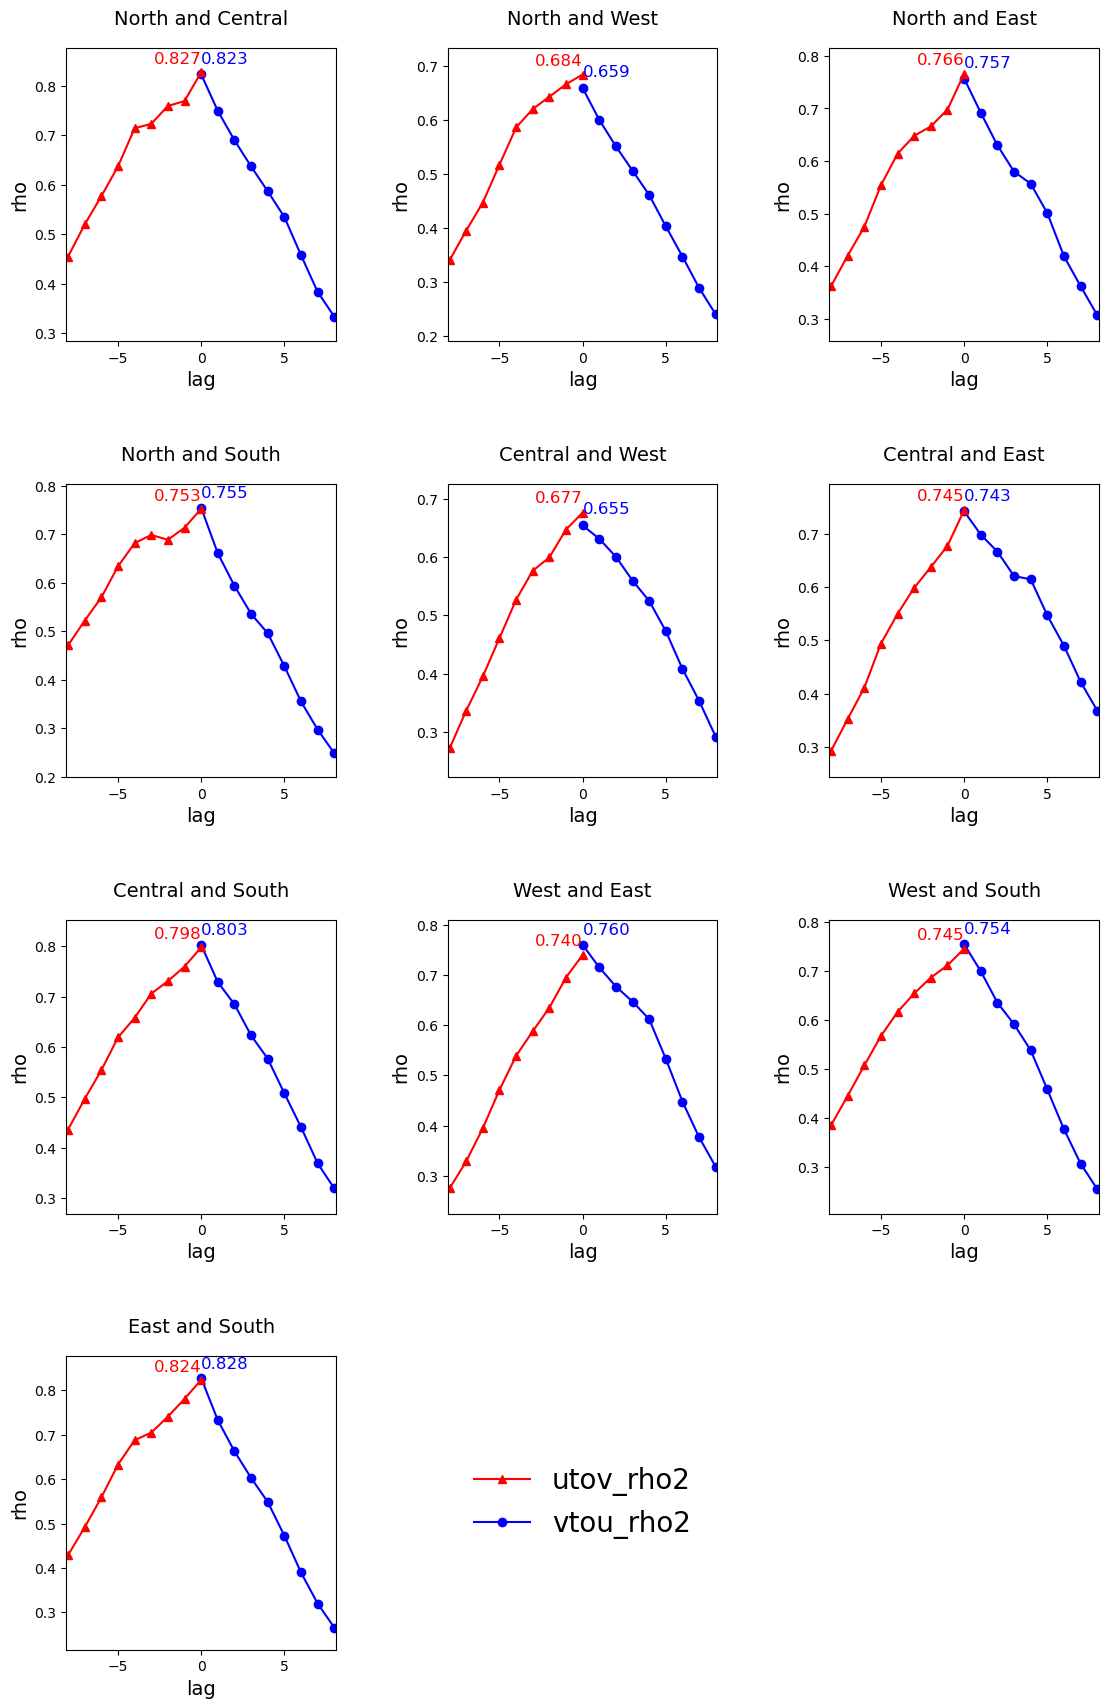

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x1 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
x2 = np.array([-8, -7, -6, -5, -4, -3, -2, -1, 0])

data = {
    "North and Central": {"y1": [0.823, 0.749, 0.690, 0.637, 0.587, 0.535, 0.458, 0.384, 0.334], "y2": [0.455, 0.520, 0.577, 0.637, 0.714, 0.723, 0.759, 0.769, 0.827]},
    "North and West": {"y1": [0.659, 0.600, 0.551, 0.506, 0.461, 0.403, 0.347, 0.289, 0.240], "y2": [0.340, 0.395, 0.447, 0.517, 0.586, 0.620, 0.643, 0.666, 0.684]},
    "North and East": {"y1": [0.757, 0.692, 0.630, 0.580, 0.557, 0.501, 0.419, 0.362, 0.307], "y2": [0.362, 0.420, 0.475, 0.554, 0.614, 0.648, 0.666, 0.698, 0.766]},
    "North and South": {"y1": [0.755, 0.661, 0.594, 0.536, 0.496, 0.428, 0.355, 0.297, 0.248], "y2": [0.471, 0.522, 0.570, 0.634, 0.682, 0.699, 0.689, 0.714, 0.753]},
    "Central and West": {"y1": [0.655, 0.632, 0.601, 0.560, 0.525, 0.473, 0.408, 0.353, 0.291], "y2": [0.271, 0.336, 0.395, 0.461, 0.527, 0.577, 0.600, 0.648, 0.677]},
    "Central and East": {"y1": [0.743, 0.699, 0.667, 0.621, 0.615, 0.547, 0.490, 0.422, 0.368], "y2": [0.292, 0.352, 0.411, 0.494, 0.550, 0.599, 0.638, 0.678, 0.745]},
    "Central and South": {"y1": [0.803, 0.729, 0.685, 0.623, 0.577, 0.508, 0.441, 0.369, 0.319], "y2": [0.436, 0.497, 0.554, 0.619, 0.658, 0.706, 0.731, 0.760, 0.798]},
    "West and East": {"y1": [0.760, 0.715, 0.677, 0.647, 0.612, 0.533, 0.448, 0.377, 0.318], "y2": [0.275, 0.329, 0.395, 0.471, 0.539, 0.588, 0.635, 0.695, 0.740]},
    "West and South": {"y1": [0.754, 0.699, 0.635, 0.591, 0.538, 0.458, 0.377, 0.307, 0.255], "y2": [0.385, 0.445, 0.507, 0.567, 0.616, 0.654, 0.686, 0.711, 0.745]},
    "East and South": {"y1": [0.828, 0.733, 0.663, 0.603, 0.549, 0.473, 0.390, 0.320, 0.266], "y2": [0.429, 0.492, 0.559, 0.633, 0.688, 0.705, 0.741, 0.781, 0.824]}
}

# Fungsi untuk membuat plot
def create_plot(x1, y1, x2, y2, title):
    plt.plot(x1, y1, marker='o', color='blue', label='v to u')
    plt.plot(x2, y2, marker='^', color='red', label='u to v')

    max_idx_y1 = np.argmax(y1)
    max_idx_y2 = np.argmax(y2)

    # Geser label sedikit untuk menghindari tumpang tindih
    plt.text(x1[max_idx_y1], y1[max_idx_y1] + 0.015, f'{y1[max_idx_y1]:.3f}', 
             color='blue', ha='left', va='bottom', fontsize=12)  
    plt.text(x2[max_idx_y2], y2[max_idx_y2] + 0.012, f'{y2[max_idx_y2]:.3f}', 
             color='red', ha='right', va='bottom', fontsize=12)

    plt.ylim(min(np.min(y1), np.min(y2)) - 0.05, max(np.max(y1), np.max(y2)) + 0.05)
    plt.xlim(min(np.min(x1), np.min(x2)) - 0.1, max(np.max(x1), np.max(x2)) + 0.1)
    plt.ylabel('rho', fontsize=14)
    plt.xlabel('lag', fontsize=14)
    plt.title(title, fontsize=14, y=1.05)

# Membuat subplot
fig, axes = plt.subplots(4, 3, figsize=(12, 18))
axes = axes.flatten()  # Ubah ke array 1D

for i, (title, values) in enumerate(data.items()):
    plt.sca(axes[i])
    create_plot(x1, values["y1"], x2, values["y2"], title)

# Tambahkan legend pada subplot yang kosong
for i in range(len(data), len(axes)):
    axes[i].axis("off")  # Nonaktifkan axis
    axes[i].legend(["v to u", "u to v"], loc="center", fontsize=12, frameon=False)  # Tambahkan legend

# Subplot terakhir untuk legend
plt.subplot(4, 3, 11)
plt.axis('off')  # Matikan sumbu
handles = [
    plt.Line2D([], [], marker='^', color='red', linestyle='-', label='utov_rho2'),
    plt.Line2D([], [], marker='o', color='blue', linestyle='-', label='vtou_rho2')
]
plt.legend(handles=handles, loc='center', fontsize=20, frameon=False)  # Tambahkan legend
    
plt.tight_layout(pad=4.0)

plt.savefig('CDD.png', dpi=300, bbox_inches='tight')
with PdfPages('CDD.pdf') as pdf:
    pdf.savefig()  # Save the current figure to the PDF



plt.show()
